In [1]:
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)

# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [2]:
df_curr = pd.read_excel('data.xlsx', sheetname='curr')

## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [3]:
df_curr.Date.dtypes

dtype('<M8[ns]')

## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [4]:
min_date, max_date = df_curr.Date.min(), df_curr.Date.max()
days = max_date - min_date
print 'Минимальная дата: {}\nМаксимальная дата: {}\nКол-во дней: {}'.format(min_date.date(), max_date.date(), days.days)

Минимальная дата: 2013-06-22
Максимальная дата: 2017-06-21
Кол-во дней: 1460


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

In [5]:
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
matplotlib.pyplot.style.use('ggplot')

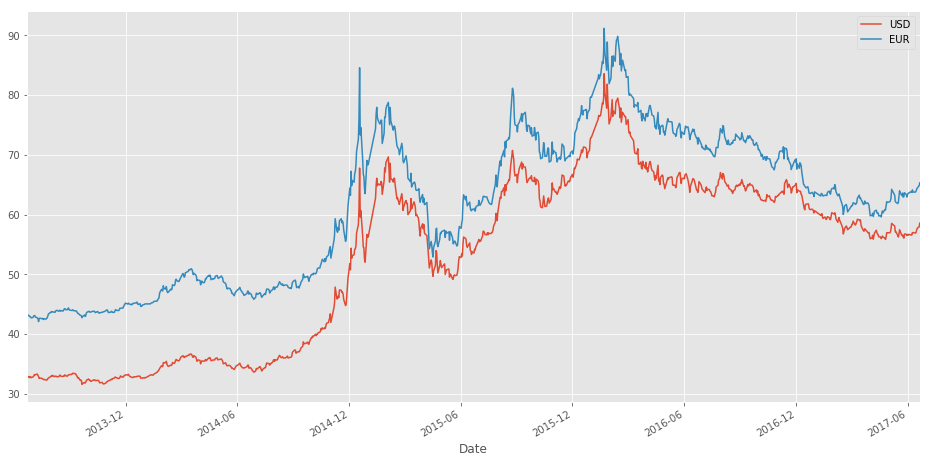

In [6]:
df_curr.set_index('Date')[['USD', 'EUR']].plot()

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [7]:
df_curr.set_index('Date').loc['2017-05', 'EUR'].mean()

62.95527368421053

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [8]:
usd_chng_srs = df_curr.set_index('Date').USD / df_curr.set_index('Date').USD.shift(1) - 1
float(df_curr.set_index('Date').USD[usd_chng_srs > 0].count()) / df_curr.shape[0]

0.5263157894736842

## Задание 2.2

Постройте гистограмму доходности доллара.

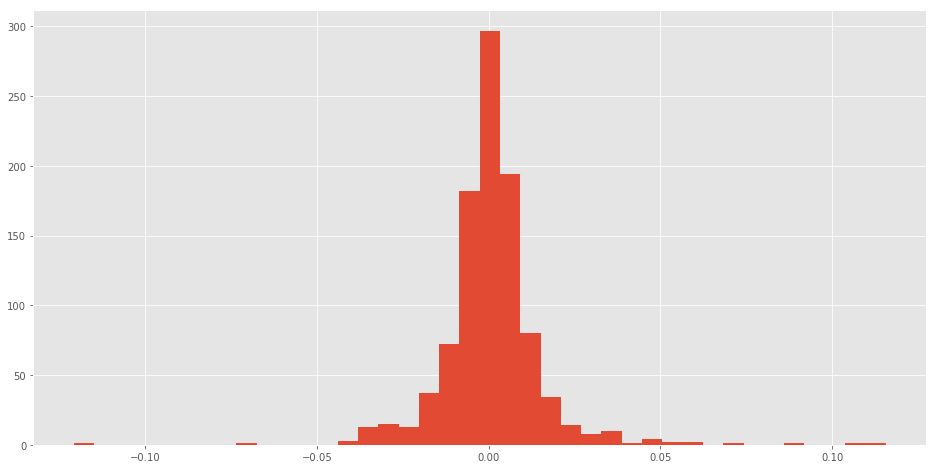

In [9]:
# честно говоря не понял в чем наглядность гистограммы доходности,
# поэтому ниже привел линейный график доходности
usd_chng_srs.hist(bins=40)

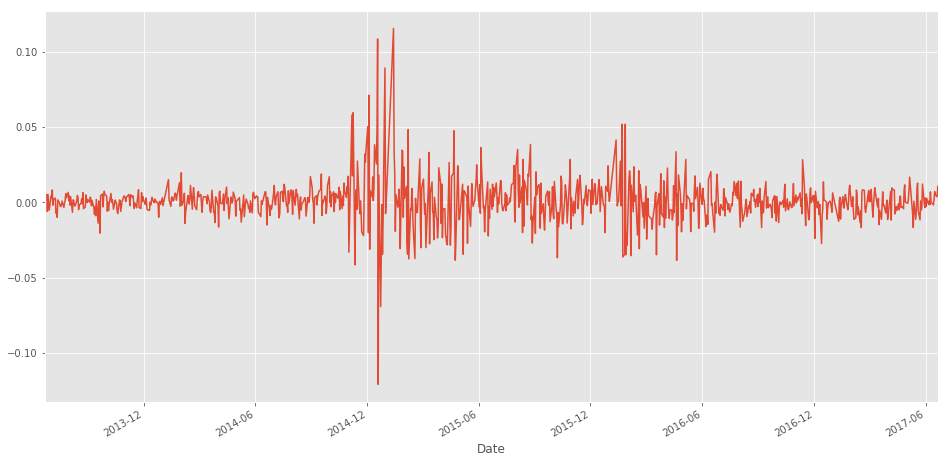

In [10]:
usd_chng_srs.plot()

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [11]:
df_curr['Weekday'] = df_curr.Date.dt.weekday.replace(
    {
        0 : u'Понедельник',
        1 : u'Вторник',
        2 : u'Среда',
        3 : u'Четверг',
        4 : u'Пятница',
        5 : u'Суббота',
        6 : u'Воскресенье'
    })

In [12]:
df_curr

,Date,USD,EUR,Weekday
0,2013-06-22,32.7433,43.3489,Суббота
1,2013-06-25,32.9097,43.1018,Вторник
2,2013-06-26,32.7140,42.9698,Среда
3,2013-06-27,32.8876,42.9841,Четверг
4,2013-06-28,32.8766,42.8349,Пятница
...,...,...,...,...
983,2017-06-15,57.0303,63.9481,Четверг
984,2017-06-16,57.4437,64.2795,Пятница
985,2017-06-17,57.7408,64.4561,Суббота
986,2017-06-20,57.9585,64.8614,Вторник


## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [13]:
df_curr.USD.corr(df_curr.EUR)

0.98230892515582857

## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

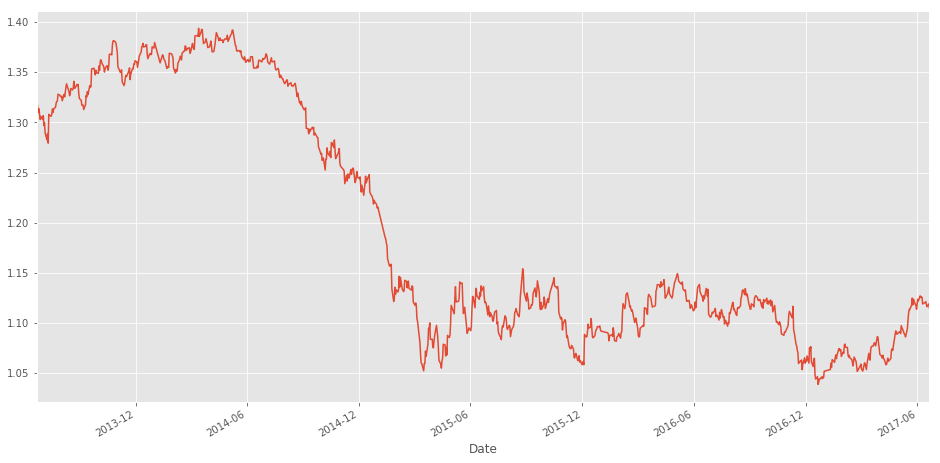

In [14]:
exchange = df_curr.set_index('Date').EUR / df_curr.set_index('Date').USD
exchange.plot()

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [15]:
df_oil = pd.read_excel('data.xlsx', sheetname='oil')
df_oil.dtypes

dt       datetime64[ns]
Brent           float64
dtype: object

## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [16]:
merged_table = pd.merge(df_curr[['Date', 'USD', 'EUR']],
                        df_oil.rename(columns={'dt' : 'Date'}),
                        on='Date'
                       ).set_index('Date')
merged_table

,USD,EUR,Brent
Date,,,
2013-06-25,32.9097,43.1018,101.51
2013-06-26,32.7140,42.9698,100.62
2013-06-27,32.8876,42.9841,102.74
2013-06-28,32.8766,42.8349,102.49
2013-07-02,32.8517,42.8025,103.96
...,...,...,...
2017-06-02,56.5373,63.5310,48.46
2017-06-06,56.6152,63.8110,48.11
2017-06-07,56.6747,63.7817,47.08


## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

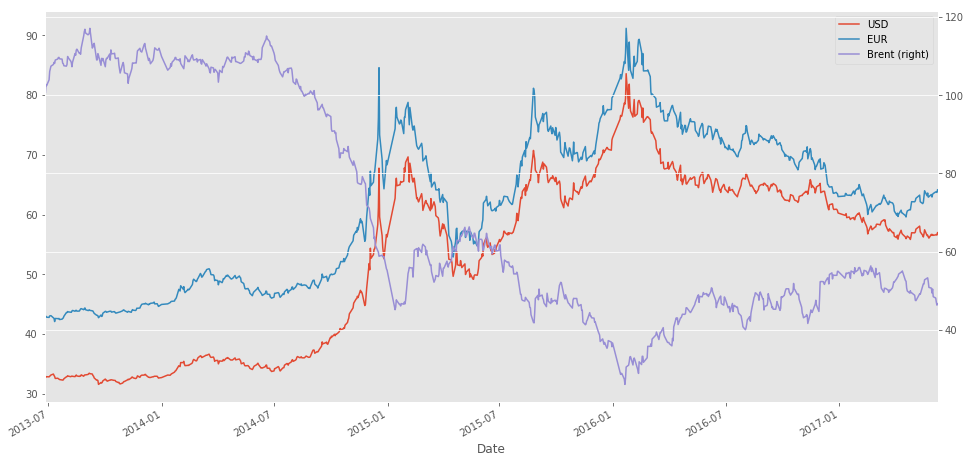

In [17]:
merged_table.plot(secondary_y='Brent')

In [18]:
merged_table.corr()

,USD,EUR,Brent
USD,1.000000,0.982142,-0.978950
EUR,0.982142,1.000000,-0.938919
Brent,-0.978950,-0.938919,1.000000


## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [19]:
eur_chng_day_df = pd.concat([df_curr['Weekday'], df_curr.EUR / df_curr.EUR.shift(1) - 1], axis=1)
eur_weekday_avr_change = eur_chng_day_df.groupby('Weekday').EUR.mean().sort_values(ascending=False)
print eur_weekday_avr_change

Weekday
Воскресенье    0.011041
Вторник        0.002029
Суббота        0.001062
Среда          0.001007
Четверг        0.000457
Пятница       -0.001908
Name: EUR, dtype: float64


##### Ответ:

In [20]:
print u'Лучше всего покупать Евро в "{}", а продавать в "{}"'.format(eur_weekday_avr_change.index[-1], eur_weekday_avr_change.index[0])

Лучше всего покупать Евро в "Пятница", а продавать в "Воскресенье"


## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.

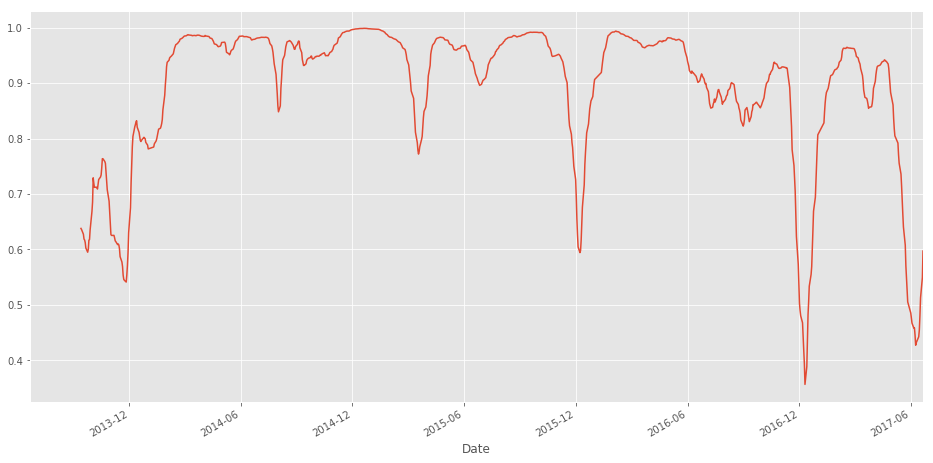

In [21]:
df_curr.set_index('Date', inplace=True)
df_curr.USD.rolling(60).corr(df_curr.EUR).plot()